<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [80]:
#Get the stock quote DX-Y.NYB
df = web.DataReader('DX-Y.NYB', data_source='yahoo', start='1990-01-01', end='2020-01-01')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998
...,...,...,...,...,...,...
2019-12-23,97.820000,97.580002,97.669998,97.680000,0.0,97.680000
2019-12-26,97.709999,97.489998,97.629997,97.589996,0.0,97.589996
2019-12-27,97.550003,96.919998,97.540001,96.919998,0.0,96.919998


In [81]:
df1 = df['Close']
df1

Date
1990-01-01    93.209999
1990-01-02    94.290001
1990-01-03    94.419998
1990-01-04    92.519997
1990-01-05    92.849998
                ...    
2019-12-23    97.680000
2019-12-26    97.589996
2019-12-27    96.919998
2019-12-30    96.739998
2019-12-31    96.389999
Name: Close, Length: 7636, dtype: float64

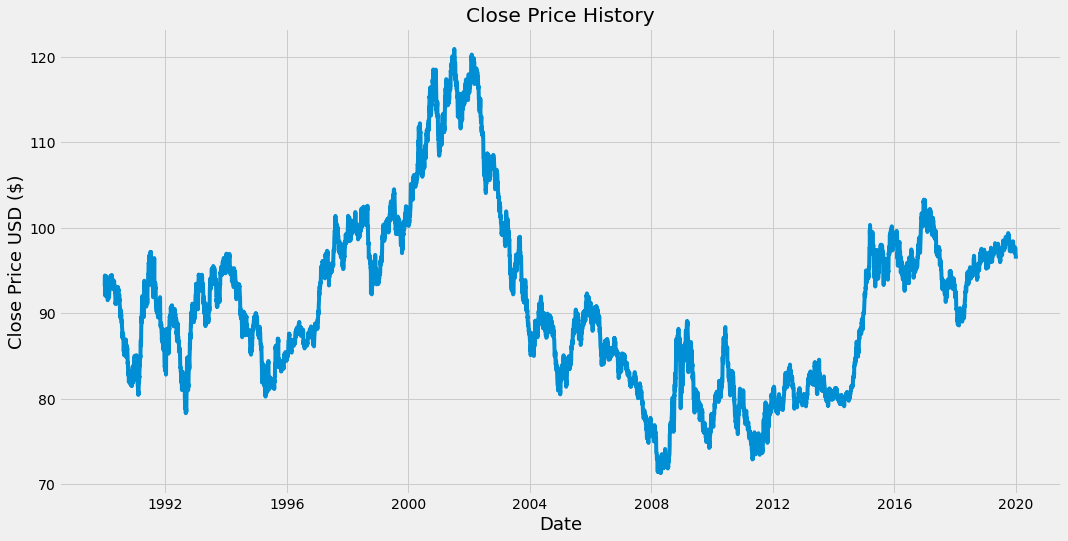

In [82]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Time Series has basically 3 components consisting of Trend, Seasonality, Irregularity, Cyclicity.

**Trend** –  Trend is the overall increase or decrease or constant variation in the value of the collected data over a period of time. It can persist for a long time as well as for a short duration at least a few days. For example. On festive seasons there is an increase in sales for a product, Population growth, etc.

**Seasonality** – Seasonality as the name suggests, shows a regular pattern in a quantity over an interval of time like sales of cold drinks increase in the summer every year. This is influenced by Seasonal, cultural, business factors, etc. The duration between the two cycles is short.

**Irregularity/ Residuals** – It is Random Component and does not follow a specific pattern. It can consist of both Trends, Seasonality with some Random fluctuations.

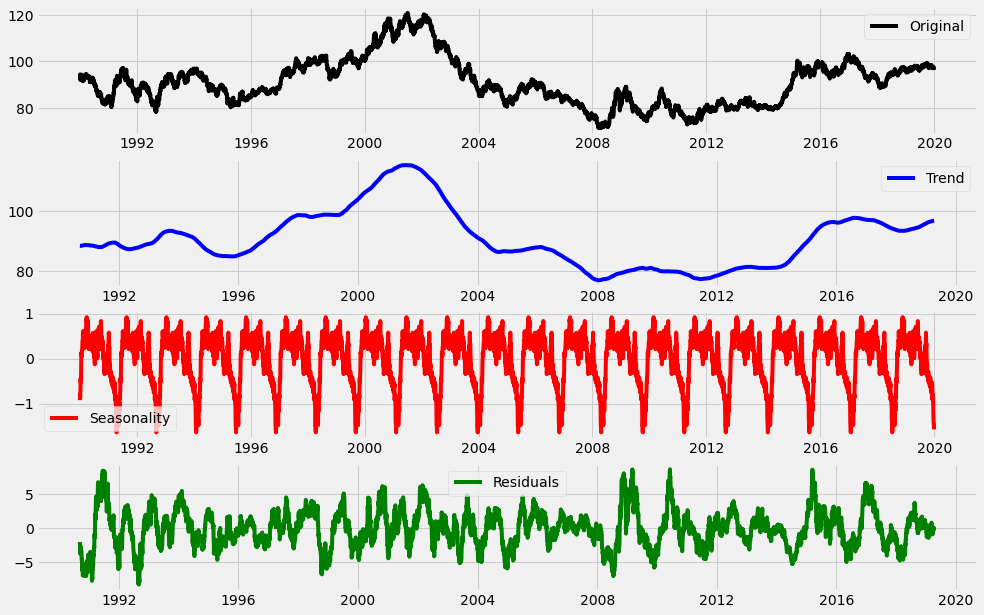

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df1
decomp = seasonal_decompose(x=data, model='additive', freq = 365)
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(data, label='Original',color='black')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

**Augmented Dickey-Fuller(ADF) Test**

ADF  test is a statistical test and these types of tests can provide confirmatory evidence that your time series is stationary or non-stationary. ADF test checks for stationarity by using a hypothesis. We may wither accept or reject this hypothesis.

Null Hypothesis – The null hypothesis is accepted and it suggests that the time series is non-stationary.
Alternate Hypothesis: The null hypothesis is rejected and it suggests the time series is stationary.
To know whether we have to accept or reject a null hypothesis demands a threshold to be set which is set upon the p-value of the ADF Test. Generally, the threshold value is 5%.

P-Value < 0.05 – Null hypothesis rejected and Time-Series is Stationary.

P-Value > 0.05 – Null hypothesis accepted and Time Series is Non- Stationary.

In [84]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -1.969534
p-value                           0.300089
#Lags Used                        0.000000
Number of Observations Used    7635.000000
Critical Value (1%)              -3.431207
Critical Value (5%)              -2.861919
Critical Value (10%)             -2.566972
dtype: float64


Applying time shifting, we subtract every the point by the one that preceded it to make data stationary

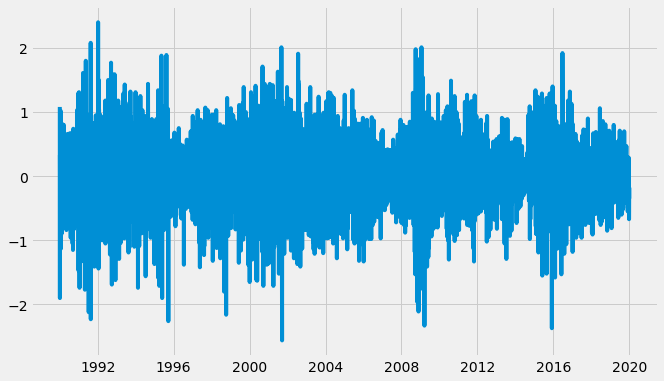

In [85]:
  df2 = df1 - df1.shift(1)
  df2.dropna(inplace=True)
  df1_stationary = df2
  plt.plot(df1_stationary)

In [86]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1_stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -88.213339
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    7634.000000
Critical Value (1%)              -3.431207
Critical Value (5%)              -2.861919
Critical Value (10%)             -2.566972
dtype: float64


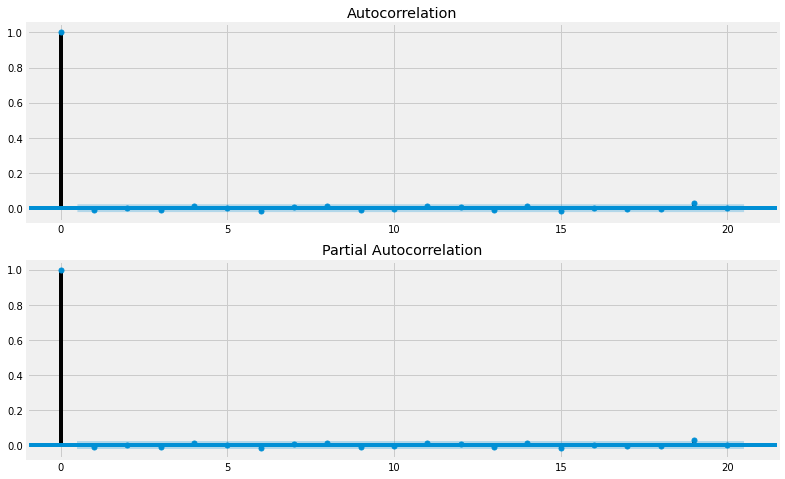

In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import statsmodels.api as sm
%matplotlib inline

#autocorrelation_plot(df1_stationary)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1_stationary, lags = 20, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1_stationary, lags = 20, ax = ax2)
#pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


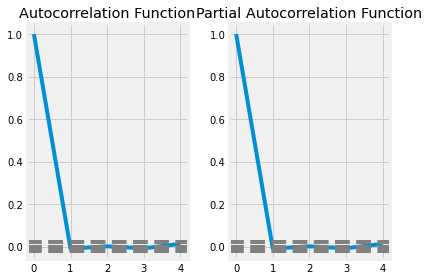

In [88]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df1_stationary, nlags=4)
lag_pacf = pacf(df1_stationary, nlags=4, method='ols')

#Plot ACF: To calculate value of p
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: To calculate value of q
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

AR -> acf = q = 1

MA -> pacf = p = 1

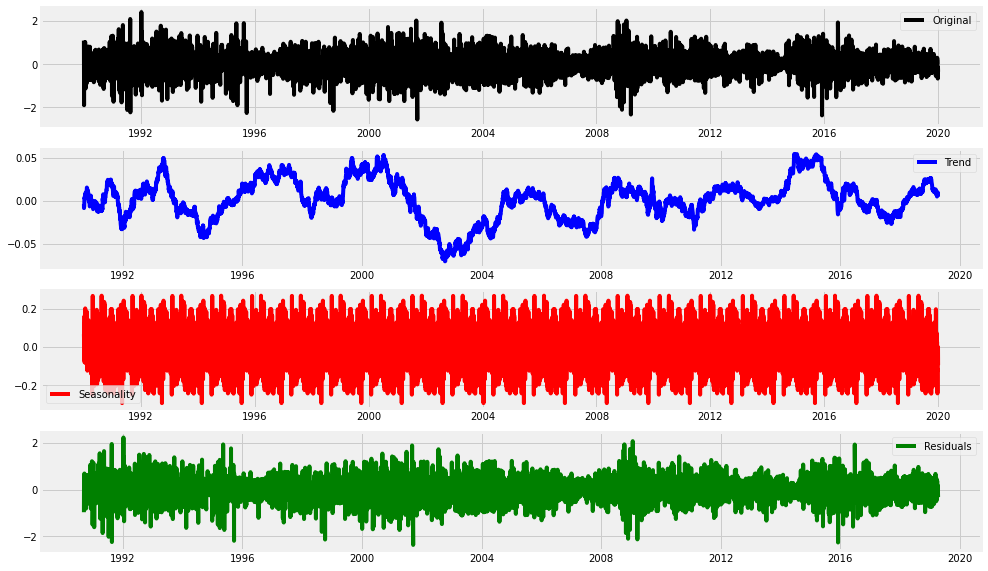

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df1_stationary
decomp = seasonal_decompose(x=data, model='additive', freq = 365)
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(data, label='Original',color='black')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

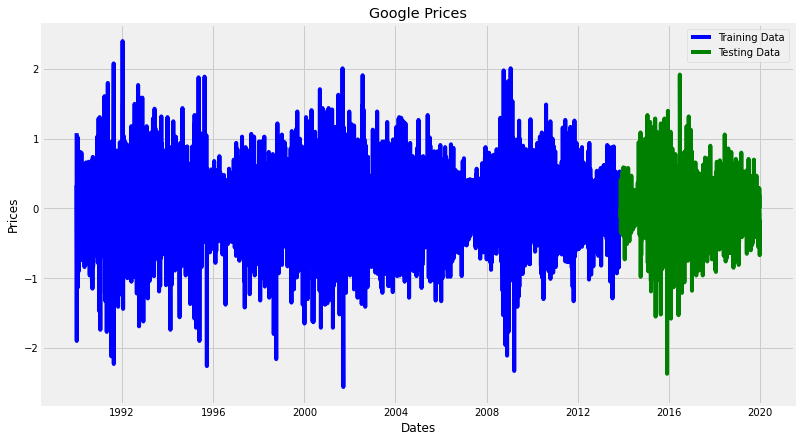

In [90]:
train_data= df1_stationary[0:int(len(df1_stationary)*0.8)]
test_data = df1_stationary[int(len(df1_stationary)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

ARIMA stands for  Auto-Regressive Integrated Moving Average. This model can be fitted to time series data in order to forecast or predict future data in the time- series. This model can also be used even if the time series is not stationary.

ARIMA model has 3 main parameters p, d, and q and that’s why this model can also be defined with the notation ARIMA(p, d, q). Let us see what these parameters are-

p – It denotes the number of AutoRegressive(AR) terms in the time series.
AutoRegression – It is a model that uses the dependent relationship between an observation and some number of lagged observations i.e the relationship between a value of a quantity collected at a time and the value of the same quantity collected at any regular interval in the past.

d – It denotes the order of difference needed for stationarity and it is the Integrated(I) part of ARIMA. We have to get understandings of the plots and other statistics to find the right order of difference. To learn more about finding the right order of difference for your model, you can refer here.

q – It denotes the order of Moving Average(MA) or the number of lagged forecast errors in the prediction equation.
Moving Average(MA) – It is defined as taking averages or changing data in small portions whose size is defined as the size of the window. This window size is taken and averages are counted by moving this window one step at a time.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 6108
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood               -6218.582
Date:                            Tue, 30 Jun 2020   AIC                          12441.165
Time:                                    15:00:24   BIC                          12454.595
Sample:                                         0   HQIC                         12445.825
                                           - 6108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.184     -5.435      0.000      -1.361      -0.639
sigma2         0.4499      0.083   

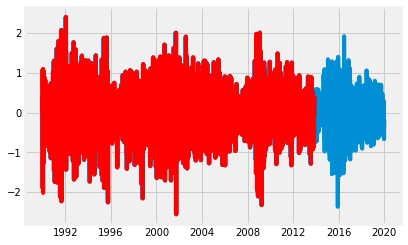

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order=(0,1,1), seasonal_order=(0,1,0,12))  
model_fit = model.fit()  
plt.plot(df1_stationary)
plt.plot(model_fit.fittedvalues, color='red')
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


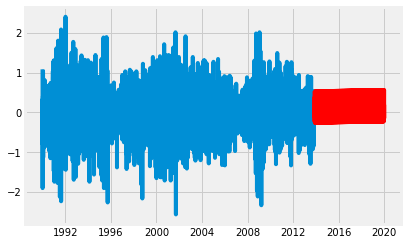

In [102]:
pred = model_fit.predict(start=(len(train_data)+1),end=(len(train_data)+len(test_data)),dynamic=True)

pred.index = test_data.index

plt.plot(train_data)
plt.plot(pred, color='r')

plt.show()

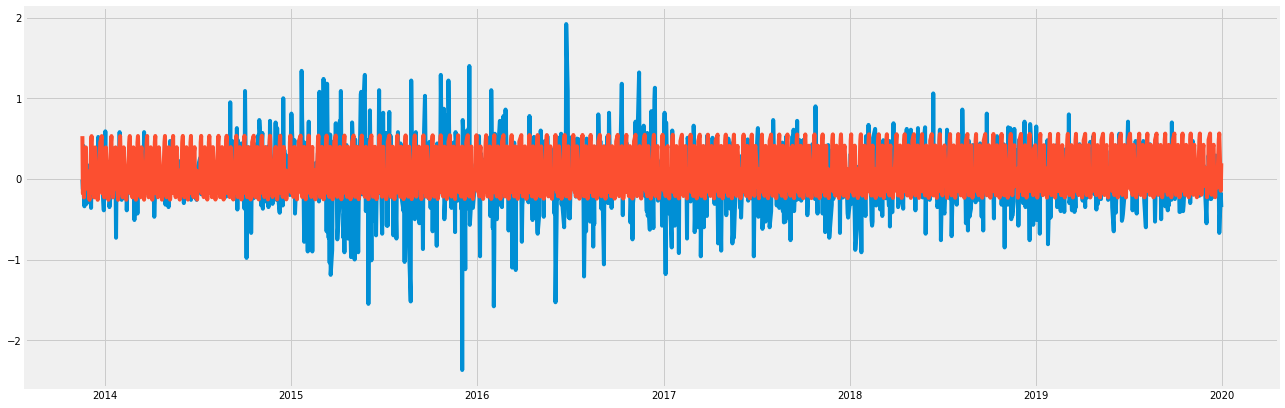

In [103]:
plt.figure(figsize=(20,7))
plt.plot(test_data)
plt.plot(pred)

plt.show()

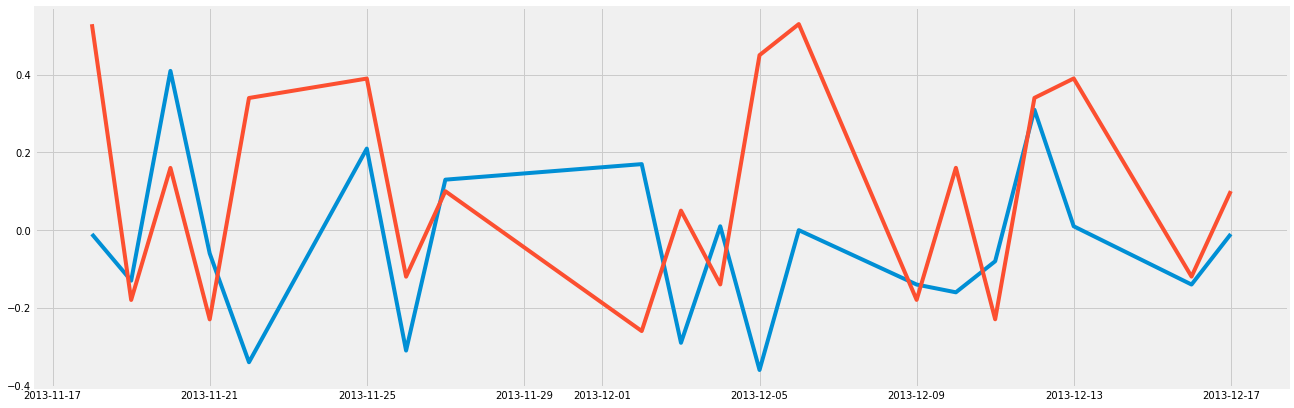

In [104]:
plt.figure(figsize=(20,7))
plt.plot(test_data[:20])
plt.plot(pred[:20])

plt.show()

In [105]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(test_data, pred))
print('Root Mean Squared Error: %.3f'% rmse)
mape = np.mean(np.abs(pred - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: %.3f'% mape)

Root Mean Squared Error: 0.487
Mean Absolute Percentage Error: inf
